<a href="https://colab.research.google.com/github/irfan030303/DIFG2130_kelas-A_25_2311533009_Irfan-Trianda/blob/main/Praktikum1/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.datasets import fetch_california_housing

In [8]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df['MedHouseValue'] = pd.Series(housing.target)

targets=df['MedHouseValue']
inputs = df.drop(['MedHouseValue'], axis=1)
df.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


In [11]:
df.describe()
df.info()
print('dataframe dimension',df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   MedHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
dataframe dimension (20640, 9)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.3, random_state=1)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(14448, 8) (6192, 8)
(14448,) (6192,)


In [16]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_test)

[[1.89659453e-01 7.45098039e-01 2.59249620e-02 ... 8.26699958e-04
  1.61530287e-01 5.94594595e-01]
 [1.01964111e-01 7.05882353e-01 2.93658328e-02 ... 1.49655077e-03
  4.50584485e-01 4.52452452e-01]
 [2.42293210e-01 8.82352941e-01 2.57625553e-02 ... 2.43712035e-03
  5.51540914e-01 1.88188188e-01]
 ...
 [1.43901463e-01 9.01960784e-01 2.71911561e-02 ... 1.63065424e-03
  5.92986185e-01 2.05205205e-01]
 [1.45508338e-01 2.35294118e-01 2.97484189e-02 ... 1.59782455e-03
  5.87672689e-01 2.06206206e-01]
 [8.33367816e-02 5.49019608e-01 1.45501245e-02 ... 1.74904890e-03
  1.65781084e-01 6.00600601e-01]]


In [19]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [21]:
print(f'intercept: {lr_model.intercept_}')
print(f'slope: {lr_model.coef_}')

intercept: 3.7215161325064994
slope: [  6.39513914   0.49408893 -14.78075919  20.98391128  -0.2003207
  -4.08551937  -3.98214561  -4.37460957]


In [22]:
y_pred=lr_model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2=lr_model.score(X_test,y_test)
print(f'MSE: {mse}')
print(f'R2: {r2}')

MSE: 0.5296293151408232
R2: 0.597142973735963


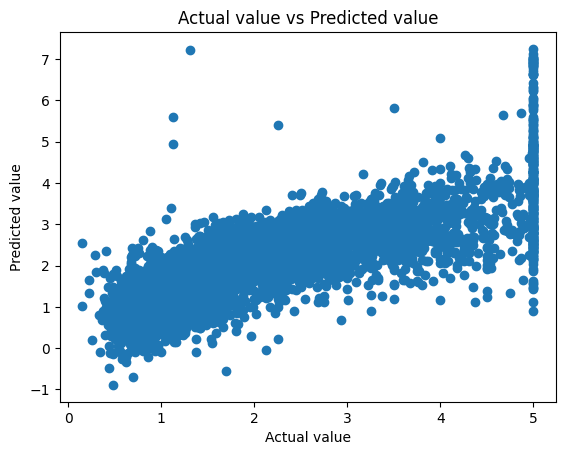

In [23]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Actual value vs Predicted value')
plt.show()

In [24]:
import pickle

filename = 'finalized_model.sav'
pickle.dump(lr_model, open(filename, 'wb'))